# Project 1A

## Imports and Example Code

In [249]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [16]:
!pip3 install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [345]:
bordered_map = [
    "HHHHHH",
    "HSFFFH",
    "HFHFHH",
    "HFFFHH",
    "HHFFGH",
    "HHHHHH"
]
env = gym.make('FrozenLake-v1', desc=bordered_map, map_name="6x6", render_mode='ansi', is_slippery=True)

In [346]:
print(env.observation_space.n)

36


In [347]:
print(env.action_space.n)

4


## Defining Value Iteration and Policy Iteration Functions

In [348]:
def value_iteration(env, gamma = 1.0):
    """
    Inputs:
    - env: the frozen lake environment.
    - gamma: discount factor
    Returns:
    - value_table: state value function
    - Q_value: state-action value function (Q function)
    """
    num_iterations = 1000
    epsilon = 1e-10
    value_table = np.zeros(env.observation_space.n)
    Q_values = np.zeros(env.action_space.n)
    for i in range(num_iterations):
        updated_value_table = np.copy(value_table)

        for s in range(env.observation_space.n):
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]])
                                for a in range(env.action_space.n)]
            
            value_table[s] = max(Q_values)
        if (np.sum(np.fabs(updated_value_table - value_table)) <= epsilon):
            break
    return value_table, Q_values

In [349]:
def extract_policy(value_table, gamma = 1.0):
    """
    Inputs:
    - value_table: state value function
    - gamma: discount factor
    Returns:
    - policy: the optimal policy
    """
    policy = np.zeros(env.observation_space.n)
    #policy = np.random.randint(0, 4, env.observation_space.n)

    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_prime])
                        for prob, s_prime, r, _ in env.P[s][a]])
                            for a in range(env.action_space.n)]
        policy[s] = np.argmax(np.array(Q_values))
    return policy

## Testing functions and generating an Optimal Policy

In [351]:
optimal_value_function, q_function = value_iteration(env=env, gamma=0.4)
optimal_policy = extract_policy(optimal_value_function, gamma=0.4)
print(np.reshape(optimal_policy, (6,6)))

[[0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 2 1 0 0 0]
 [0 0 2 3 0 0]
 [0 0 0 0 0 0]]


In [353]:
optimal_value_function, q_function = value_iteration(env=env, gamma=0.9)
optimal_policy = extract_policy(optimal_value_function, gamma=0.9)
print(np.reshape(optimal_policy, (6,6)))

[[0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 2 1 0 0 0]
 [0 0 2 3 0 0]
 [0 0 0 0 0 0]]


In [354]:
printing = False
total_rewards = 0
for episode in range(10000):
    state = env.reset()[0]
    done = False
    while not done:
        if printing:
            print(env.render())
            print('---------\n')
        action = optimal_policy[state]
        next_state, reward, done, info, _ = env.step(int(action))
        state = next_state
        total_rewards += reward
    if printing:
        print(env.render())
    

In [355]:
total_rewards

174.0

In [356]:
state = env.reset()[0]
done = False
while not done:
    print(env.render())
    print('---------\n')
    action = optimal_policy[state]
    next_state, reward, done, info, _ = env.step(int(action))
    state = next_state
    total_rewards += reward
    print(env.render())


HHHHHH
HSFFFH
HFHFHH
HFFFHH
HHFFGH
HHHHHH

---------

  (Down)
HHHHHH
HSFFFH
HFHFHH
HFFFHH
HHFFGH
HHHHHH



## Testing Gamma Values and Measuring Total Reward of Resulting Polcies

In [361]:
test_results = {}
for g in range(0, 101, 5):
    gam = g/100
    optimal_value_function, q_function = value_iteration(env=env, gamma=gam)
    optimal_policy = extract_policy(optimal_value_function, gamma=gam)
    printing = False
    total_rewards = 0
    for episode in range(10000):
        state = env.reset()[0]
        done = False
        for limit in range(101):
            if printing:
                print(env.render())
                print('---------\n')
            action = optimal_policy[state]
            next_state, reward, done, info, _ = env.step(int(action))
            state = next_state
            total_rewards += reward
        if printing:
            print(env.render())
    test_results[gam] = total_rewards

In [362]:
print(env.render())

  (Left)
HHHHHH
HSFFFH
HFHFHH
HFFFHH
HHFFGH
HHHHHH



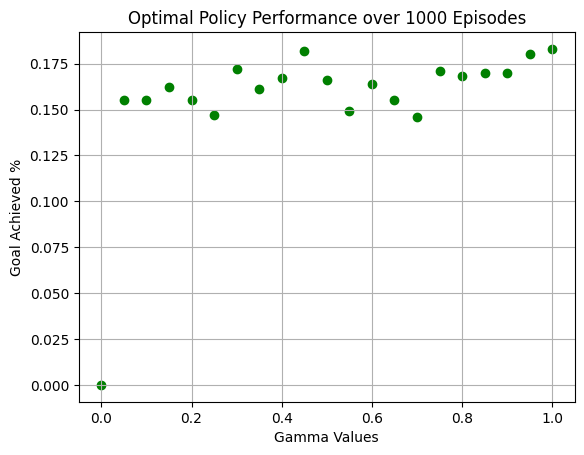

In [363]:
x_values = list(test_results.keys())
y_values = list(test_results.values())
plt.scatter(x_values, list(map(lambda x: x / 1000, y_values))  , color='green', marker='o')
plt.xlabel('Gamma Values')
plt.ylabel('Goal Achieved %')
plt.title('Optimal Policy Performance over 1000 Episodes')
plt.grid(True)

In [ ]:
for g in range(0, 11, 1):
    gam = g/10
    
    optimal_value_function, q_function = value_iteration(env=env, gamma=gam)
    optimal_policy = extract_policy(optimal_value_function, gamma=gam)
    print(gam, '\n', np.reshape(optimal_policy, (4,4)))